# Analysis of Monte Carlo simulation results

This notebook contains (mostly fairly undocumented) analysis of the MC simulation. The numbers and figures from the paper were computed using this code. 

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "rmfamily"
})
plt.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'

In [2]:
def disp(array, inr=True):
    return r"${:.1f} \pm {:.1f}{}$".format(array.mean(), array.std(), r"\ \mathrm{INR}" if inr else "")

In [3]:
data = np.load("data/mc_results_tuta.npz", allow_pickle=True)
averages_per_agent_array = data["averages_per_agent_array"]
cost_vector = data["cost_vector"]
averages_per_agent_array.shape

(10, 5, 4)

(mc_runs, decision_options, interventions)

In [4]:
cost_vector

array([ 72., 868., 795.,   0.])

In [5]:
data["columns"]

array(['monitorings', 'crop_losses', 'treatments', 'treatments_directly'],
      dtype=object)

In [6]:
columns = ['monitoring', 'yield loss', 'curative spraying', 'preventive spraying']

In [7]:
scenario_labels = [
    "inaction",
    "daily monitoring",
    "calendar spraying",
    "model",
    "model (no updating)"
]

scenario_labels_tex = list(reversed([
    "inaction",
    "daily monitoring",
    "calendar spraying",
    r"\textbf{model}",
    "model (no updating)"
]))

In [8]:
for sc_i in range(5):
    print("{:20s} {}".format(scenario_labels[sc_i], disp((averages_per_agent_array[:, sc_i, :] * cost_vector).sum(axis=1), False)))

inaction             $9568.7 \pm 374.2$
daily monitoring     $8388.9 \pm 8.9$
calendar spraying    $8490.2 \pm 0.0$
model                $6776.3 \pm 237.3$
model (no updating)  $7580.3 \pm 163.8$


In [9]:
print("Sum of community EVPI per person:", disp(((averages_per_agent_array[:, 4, :] - averages_per_agent_array[:, 3, :]) * cost_vector).sum(axis=1)))
print("Monitorings per person (model scenario): " + disp(averages_per_agent_array[:, 3, 0], False))
print("Monitorings in total (model scenario): " +
      disp(averages_per_agent_array[:, 3, 0] * 8925, False))
print("Community EVPI per monitoring: ", disp((
    (averages_per_agent_array[:, 4, :] - averages_per_agent_array[:, 3, :]) * cost_vector).sum(axis=1) / averages_per_agent_array[:, 3, 0]))

Sum of community EVPI per person: $804.0 \pm 134.6\ \mathrm{INR}$
Monitorings per person (model scenario): $10.1 \pm 2.6$
Monitorings in total (model scenario): $89864.7 \pm 23049.8$
Community EVPI per monitoring:  $88.2 \pm 34.2\ \mathrm{INR}$


In [10]:
print("Absolute difference model (updating) - model (no updating) ", disp(((averages_per_agent_array[:, 4, :] * cost_vector).sum(axis=1) - \
           (averages_per_agent_array[:, 3, :] * cost_vector).sum(axis=1)), False))

Absolute difference model (updating) - model (no updating)  $804.0 \pm 134.6$


In [11]:
print("Absolute difference calendar - model ", disp(((averages_per_agent_array[:, 2, :] * cost_vector).sum(axis=1) - \
           (averages_per_agent_array[:, 3, :] * cost_vector).sum(axis=1)), False))

Absolute difference calendar - model  $1713.8 \pm 237.3$


In [12]:
print("Number of monitorings in model (updating) scenario: ", disp(averages_per_agent_array[:, 3, 0]))

Number of monitorings in model (updating) scenario:  $10.1 \pm 2.6\ \mathrm{INR}$


In [13]:
print("Relative difference calendar - model ", disp(((averages_per_agent_array[:, 2, :] * cost_vector).sum(axis=1) - \
           (averages_per_agent_array[:, 3, :] * cost_vector).sum(axis=1)) / (averages_per_agent_array[:, 3, :] * cost_vector).sum(axis=1) * 100, False))


Relative difference calendar - model  $25.4 \pm 4.3$


In [14]:
print("Pesticide use - model compared to calender: ", disp((averages_per_agent_array[:, 3, 2] / averages_per_agent_array[:, 2, 2] - 1) * 100, False))
print("Pesticide use - monitoring compared to calender: ", disp((averages_per_agent_array[:, 1, 2] / averages_per_agent_array[:, 2, 2] - 1) * 100, False))
print("Yield loss - model compared to inaction: ", disp((averages_per_agent_array[:, 3, 1] / averages_per_agent_array[:, 0, 1] - 1) * 100, False))
print("Pesticide use - model (no updating) compared to calender: ", disp((averages_per_agent_array[:, 4, 2] / averages_per_agent_array[:, 2, 2] - 1) * 100, False))


Pesticide use - model compared to calender:  $-58.8 \pm 2.7$
Pesticide use - monitoring compared to calender:  $-53.4 \pm 0.4$
Yield loss - model compared to inaction:  $-73.2 \pm 3.2$
Pesticide use - model (no updating) compared to calender:  $-35.7 \pm 5.5$


In [15]:
print(disp(averages_per_agent_array[:, 3, 0]))

$10.1 \pm 2.6\ \mathrm{INR}$


In [16]:
df = pd.DataFrame(averages_per_agent_array.mean(axis=0), index=scenario_labels, columns=columns)# * cost_vector
df["curative spraying"] -= df["preventive spraying"]
df

,monitoring,yield loss,curative spraying,preventive spraying
inaction,0.000000,11.023899,0.000000,0.000000
daily monitoring,61.543294,0.000000,4.978342,0.000000
calendar spraying,0.000000,0.000000,0.000000,10.679440
model,10.068874,2.945367,1.218835,3.177109
model (no updating),3.211272,2.180168,0.325277,6.538465


In [17]:
cost_vector2 = cost_vector.copy()
cost_vector2[3] = cost_vector2[2]
df = pd.DataFrame(averages_per_agent_array.mean(axis=0), index=scenario_labels, columns=columns)# * cost_vector
#df.drop(columns="treatments_directly", inplace=True)
df["curative spraying"] -= df["preventive spraying"]
df *= cost_vector2
df

,monitoring,yield loss,curative spraying,preventive spraying
inaction,0.000000,9568.744471,0.000000,0.000000
daily monitoring,4431.117176,0.000000,3957.781681,0.000000
calendar spraying,0.000000,0.000000,0.000000,8490.154622
model,724.958924,2556.578510,968.973613,2525.801849
model (no updating),231.211563,1892.385882,258.595462,5198.079664


In [18]:
costs = (averages_per_agent_array[:, :, :] * cost_vector).sum(axis=2)

In [19]:
scenario_labels_tex

['model (no updating)',
 '\\textbf{model}',
 'calendar spraying',
 'daily monitoring',
 'inaction']

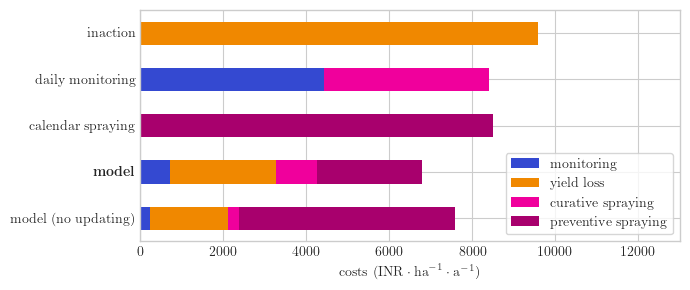

In [20]:
custom_cmap = ListedColormap(['#3449d1', '#f08800', '#f0009c', '#a8006d'])

fig, ax = plt.subplots(1, figsize=(7, 3))
df.iloc[::-1].plot(ax=ax, kind="barh", stacked=True, cmap=custom_cmap)
ax.set_xlim(0, 12000)
ax.set_xlabel(r"costs ($\text{INR}\cdot\text{ha}^{-1} \cdot\text{a}^{-1}$)")
ax.set_yticklabels(scenario_labels_tex)
ax.legend(frameon=True)
ax.set_xlim(0, 13000)
fig.tight_layout()